# Relax_Take_Home_Challenge<a id='2_Data_wrangling'></a>

## Table of Contents<a id='2.1_Contents'></a>
* 0. Imports
* 1. Introduction
* 2. Load/Transform and Assess Data Null Values
  * 2.1 Takehome_users Dataset
  * 2.2 Takehome_user_engagement Dataset
  * 2.3 Merge Users & Engagement Datasets/Feature Engieering
* 3. EDA Merged User Dataset
  * 3.1 Feature Plots
  * 3.2 Correlation Heatmap
* 4. Preprocessing/Modeling
  * 4.1 Train_test_split
  * 4.2 Random Forest Classification
  * 4.3 Gradient Boosted Classification
  * 4.4 AdaBoost Classification (Random Forest Classification Base)
  * 4.5 AdaBoost Classification (Gradient Boosting Classification Base)
* 5. Conclusions/Further Study
  * 5.1 Summary Table/Model Results
  * 5.2 Discussion/Further Study

## 0. Imports<a id='2.3_Imports'></a>

Importing all necessary modules for the take-home assignment tasks.

In [31]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime
import os

## 1. Introduction

Below is the prompt given for the take-home assignment (further information regarding data table features given within the prompt provided):

The data has the following two tables:
1) A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years.
2) A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption.

## 2. Load/Transform and Assess Data Null Values

Data is first loaded into the notebook from csv file to pandas dataframe to be assessed. 

In [32]:
#Code to address encoding for read_csv found on https://www.roelpeters.be/unicodedecodeerror-utf-8-codec-cant-decode-byte-in-position/
path = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Springboard/Springboard_Take_Home_Challenges/relax_challenge/takehome_users.csv'
users_df = pd.read_csv(path, encoding='latin1')
path_2 = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Springboard/Springboard_Take_Home_Challenges/relax_challenge/takehome_user_engagement.csv' 
engage_df = pd.read_csv(path_2, encoding='latin1')

### 2.1 Takehome_users Dataset

In [33]:
users_df.head() 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [34]:
#Code to convert unix datetime to datetime for column 'last_session_creation_time' found on https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])

In [35]:
users_df.head() 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


Assesing null values for takehome_users dataset.

In [36]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Most null values are within the 'last_session_creation_time' column which could be an issue with the database or datawarehouse storing user data or another issue outside the scope of this study which would need to be further clarified with those involved. However, invited_by_user_id also has null values which is expected as not all users were invited by another user for to access the product.

In [37]:
#Converting 'object_id' or user_id into string object instead of it being an int64 field.
users_df['object_id'] = users_df['object_id'].astype(str)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  object        
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 937.6+ KB


### 2.2 Takehome_user_engagement Dataset

In [38]:
engage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [39]:
engage_df['time_stamp'] = pd.to_datetime(engage_df['time_stamp'])
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


Looking at the above, it seems this dataset does not have null values meaning each login entry has an associated value.

In [40]:
#Converting 'user_id' into string object instead of it being an int64 field.
engage_df['user_id'] = engage_df['user_id'].astype(str)
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  object        
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.8+ MB


In order to now retrieve the specific value of finding users who had logged into the product for 3 separate days within at least a 7-day period, several grouping methods needed to be conducted.

In [41]:
#Setting 'time_stamp' column values as the index in order to group by the time series data.
engage_df = engage_df.set_index('time_stamp')
engage_df

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [42]:
#Code to retrieve specific groupings for the different 'user_id' and their associated time_stamps found on https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
visit_df = engage_df.groupby('user_id', group_keys=True)[['visited']].apply(lambda x:x)
visit_df

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
10      2013-01-16 22:08:03        1
        2013-01-22 22:08:03        1
        2013-01-30 22:08:03        1
        2013-02-04 22:08:03        1
...                              ...
9999    2014-05-09 18:00:21        1
        2014-05-15 18:00:21        1
        2014-05-18 18:00:21        1
        2014-05-26 18:00:21        1
        2014-05-31 18:00:21        1

[207917 rows x 1 columns]

In [43]:
#Code to retrieve size of each group and then retrict the size to create a boolean series for user_id's where size >=3 to find 
#users who logged into the product at least 3 separate days found on https://stackoverflow.com/questions/17945247/get-size-of-a-group-knowing-its-grouper-id-in-pandas-groupby and https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html
user_true = visit_df.groupby('user_id', group_keys=True).size() >= 3
user_true

user_id
1        False
10        True
100      False
10000    False
10002     True
         ...  
9994      True
9995     False
9996     False
9998     False
9999      True
Length: 8823, dtype: bool

In [44]:
#Code to retrieve values from the Boolean series found on https://stackoverflow.com/questions/52173161/getting-a-list-of-indices-where-pandas-boolean-series-is-true
user_arr = user_true[user_true].index.values
user_arr

array(['10', '10002', '10003', ..., '9992', '9994', '9999'], dtype=object)

After retrieving the specifc 'user_id''s who meet the condition, then transformed this array into dictionary with an 'adopted_user' columns identified as true or 1.0.

In [45]:
user_dict = {}
for i in range(len(user_arr)):
    user_dict[i] = user_arr[i]

In [46]:
user_dict 

{0: '10',
 1: '10002',
 2: '10003',
 3: '10006',
 4: '10011',
 5: '10015',
 6: '10020',
 7: '10022',
 8: '10023',
 9: '10025',
 10: '10030',
 11: '10053',
 12: '10058',
 13: '10059',
 14: '10062',
 15: '10064',
 16: '1007',
 17: '10070',
 18: '10074',
 19: '10079',
 20: '10084',
 21: '1009',
 22: '10100',
 23: '10102',
 24: '10104',
 25: '10115',
 26: '10118',
 27: '10121',
 28: '10122',
 29: '10126',
 30: '1013',
 31: '10153',
 32: '10155',
 33: '10159',
 34: '10165',
 35: '10167',
 36: '1017',
 37: '10177',
 38: '1018',
 39: '10199',
 40: '10207',
 41: '10211',
 42: '10212',
 43: '10217',
 44: '10222',
 45: '10225',
 46: '10230',
 47: '10233',
 48: '10234',
 49: '10238',
 50: '10244',
 51: '10246',
 52: '10251',
 53: '10257',
 54: '10258',
 55: '1026',
 56: '10265',
 57: '10268',
 58: '1027',
 59: '10274',
 60: '10277',
 61: '10281',
 62: '10283',
 63: '10291',
 64: '10299',
 65: '1030',
 66: '10303',
 67: '10307',
 68: '10311',
 69: '10316',
 70: '10320',
 71: '10322',
 72: '10332',

In [47]:
#Code to retrieve the values for a dictionary found on https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
user_df_2 = pd.DataFrame(user_dict.items(), columns=['id', 'object_id'])
user_df_2 = user_df_2.drop(['id'], axis=1)
user_df_2['adopted_user'] = 1
user_df_2

,object_id,adopted_user
0,10,1
1,10002,1
2,10003,1
3,10006,1
4,10011,1
...,...,...
2243,999,1
2244,9991,1
2245,9992,1
2246,9994,1


### 2.3 Merge Users & Engagement Datasets/Feature Engieering

After identifying users who logged into the product for 3 separate days or more as an adopted user, then I merged the two datasets for futher assessment.

In [48]:
merge_df = pd.merge(users_df, user_df_2, on='object_id', how='left')

In [49]:
#Code to replace NaN values after merging to 0 found on https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-in-a-dataframe-column
merge_df['adopted_user'] = merge_df['adopted_user'].fillna(0)

In [50]:
merge_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0.0


For further assessment in EDA, created another feature column in order to properly assess datetime columns of 'create_time' and 'last_session_creation_time' by creating a new field labeled as 'date_diff' take the difference of days between both the column datetime values. 

In [51]:
#Code to filter out NaT values from pandas dataframe found on https://stackoverflow.com/questions/23747451/filtering-all-rows-with-nat-in-a-column-in-dataframe-python
merge_df['date_diff'] = merge_df['last_session_creation_time'] - merge_df['creation_time']
filter_NaT = merge_df[merge_df['date_diff'].notnull()]
merge_df['date_diff'] = filter_NaT['date_diff'].astype(str).str.strip('days').astype(float)
merge_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,date_diff
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0.0,5.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0.0,2.0


In [70]:
merge_df[merge_df['date_diff'].isnull() == True ]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,date_diff
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0.0,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0.0,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0,0.0,NaN
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN,0.0,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,248,NaN,0.0,NaN
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaT,1,0,29,NaN,0.0,NaN
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,74,NaN,0.0,NaN
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,281,NaN,0.0,NaN


In order to handle the missing values within the 'last_session_creation_time' column causing 'date_diff' to also have null values, the 'date_diff' column NaT values will be imputed with the mean of the 'date_diff' days for sake of example. However, in actual implementation, further communication will be needed to properly assess reasoning for null values within the 'last_session_creation_time' column.

In [74]:
merge_df['date_diff'] = merge_df['date_diff'].fillna(merge_df['date_diff'].mean())

In [76]:
merge_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
date_diff                        0
dtype: int64

## 3. EDA Merged User Dataset

### 3.1 Feature Plots

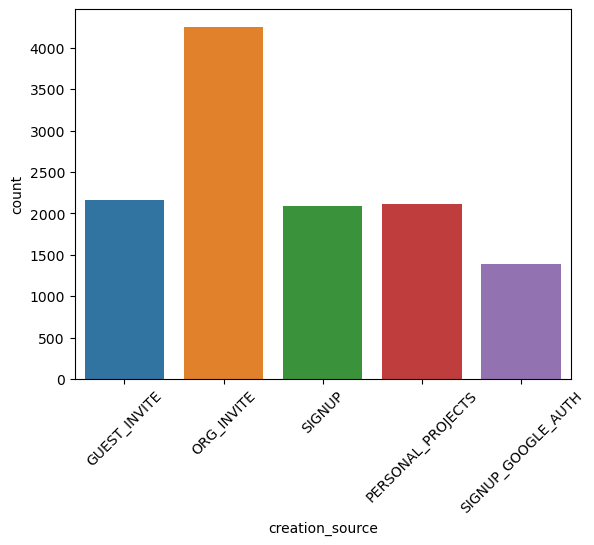

In [77]:
sns.countplot(data=merge_df, x='creation_source')
plt.xticks(rotation=45)
plt.show()

Looking at the above plot, it seems most users account were created through an invitation from the organization with then being invited as a guest, created via the website, and finally created through joining another current user's workspace. 

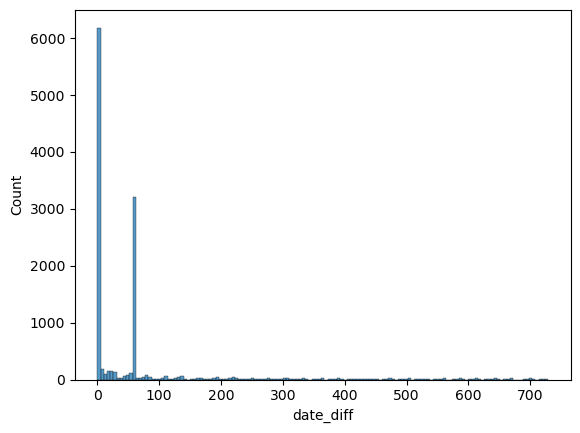

In [78]:
sns.histplot(data=merge_df, x='date_diff')
plt.show()

The above plot indicates that most user activity happens within the first few times the user logged into the product with also several showing within the imputed 59 days (again this assumption will need to be further assessed for those involved as per why 'last_session_creation_time' had null values. A potential marketing insight could be to try and market create discounts for users to continue to stay on the product for a longer term.

### 3.2 Correlation Heatmap

In [79]:
#Creating dummy variables for categorical creation source but also dropping values within column to build a correlation object to see relationships between features and target
dummy_merge = pd.get_dummies(merge_df, columns=['creation_source'])
dummy_merge = dummy_merge.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id', 'org_id'], axis=1)

In [80]:
dummy_merge

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,date_diff,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0.0,0.0,1,0,0,0,0
1,0,0,1.0,136.0,0,1,0,0,0
2,0,0,0.0,0.0,0,1,0,0,0
3,0,0,0.0,1.0,1,0,0,0,0
4,0,0,0.0,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11995,0,0,0.0,0.0,0,1,0,0,0
11996,0,0,0.0,5.0,0,0,0,0,1
11997,1,1,0.0,0.0,1,0,0,0,0
11998,0,0,0.0,2.0,0,0,1,0,0


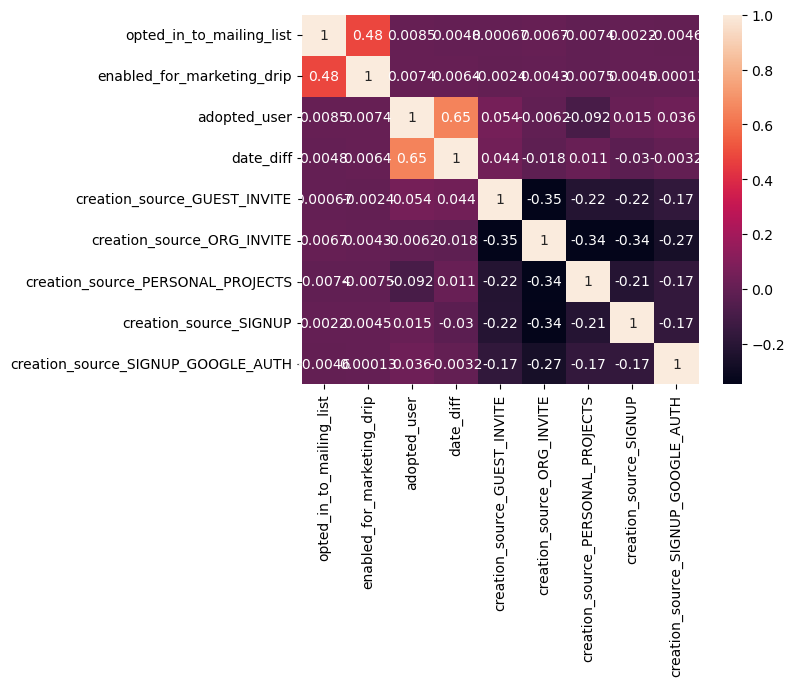

In [81]:
dummy_core = dummy_merge.corr()
sns.heatmap(dummy_core, annot=True)
plt.show()

In [82]:
dummy_core['adopted_user'].sort_values(ascending=False)

adopted_user                          1.000000
date_diff                             0.652104
creation_source_GUEST_INVITE          0.053783
creation_source_SIGNUP_GOOGLE_AUTH    0.036458
creation_source_SIGNUP                0.015234
opted_in_to_mailing_list              0.008452
enabled_for_marketing_drip            0.007370
creation_source_ORG_INVITE           -0.006213
creation_source_PERSONAL_PROJECTS    -0.092252
Name: adopted_user, dtype: float64

It seems from an initial EDA of the dataset, not only is when the user signed up for the product and their last login date highly correlated with whether or not the user is an adopted user, but it seems if the user was invited as a guest within the system, they seemed to be more likely to be an adopted user down the line. However, if the user was invited or within the system because of personal projects, they seemed less likely to or less correlated to become an adopted user for the product. Also it seems that the more overrepresented group of ORG_INVITE or if a user was invited by the organization they were actually not as likely to become an adopted user which is surprising and something to keep note of in terms of marketing. The ORG_INVITE column however due to its more representation would be needed to be dropped when in future development of predictive models to avoid the dummy variable trap.

## 4. Preprocessing/Modeling

In order to develop proper insights as per determining the features from the datasets with predictive power, the dataset will have a 70/30 split to gather train and test sets in order to develop predictive models to assess feature importances to determine which features predict the target variable of 'adopted_user."

Therefore models that have the feature_importances attritube will be assessed and hyperparameterized in order to get a working model that not only performs well but also has interpretability as per features guiding its predictions. All of the code regarding training, hyperparameterizing, and assessing the different models was taken from another take-home challenge to be applied for this excercise.

### 4.1 Train_test_split

In [83]:
#Dropping column 'creation_source_ORG_INVITE' to avoid dummy variable trap in terms of intercollineraity between the categorical feature of 'creation_source'
dummy_merge_cleaned = dummy_merge.drop(['creation_source_ORG_INVITE'], axis=1)

In [84]:
#Splitting above dummy_merge_cleaned dataset into separate X and y sets for train_test_split
X = dummy_merge_cleaned.drop(['adopted_user'],axis=1)
y = dummy_merge_cleaned['adopted_user']

In [85]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.2 Random Forest Classification

Training Random Forest Classification Model as well as applying GridSearchCV in order to test different hyperparameters for penalty and perform 5-fold cross validation to provide a more generalizable model.

In [86]:
randForest = RandomForestClassifier()
params_randForest = {'n_estimators':[10,50,100,200], 'criterion':['gini','entropy','log_loss'],'max_depth':[10,50,100,200]}
randForest_grided = GridSearchCV(estimator=randForest, param_grid=params_randForest, scoring='accuracy', cv=5)

In [87]:
start_randForest = time.time()
randForest_grided.fit(X_train, y_train)
end_randForest = time.time()
total_randForest = end_randForest - start_randForest

In [88]:
randForest_grided.best_estimator_.feature_names_in_

array(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'date_diff', 'creation_source_GUEST_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'], dtype=object)

In [89]:
randForest_grided.best_estimator_.feature_importances_

array([0.00243869, 0.00201278, 0.98257617, 0.00134578, 0.00519405,
       0.00225187, 0.00418066])

In [90]:
randForest_grided.best_params_

{'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 10}

In [91]:
print(f"Random Forest Classification fit time: {total_randForest:.2f} seconds")

Random Forest Classification fit time: 55.69 seconds


In [92]:
predict_randForest = randForest_grided.predict(x_test)

In [93]:
randForest_grided.best_score_

0.9760714285714286

In [94]:
print(confusion_matrix(predict_randForest, y_test))

[[2885   26]
 [  54  635]]


In [95]:
fpr_randForest, tpr_randForest, thresholds_randForest = roc_curve(predict_randForest, y_test)

In [96]:
randForest_roc = roc_auc_score(predict_randForest, y_test)
randForest_roc

0.9563469528274465

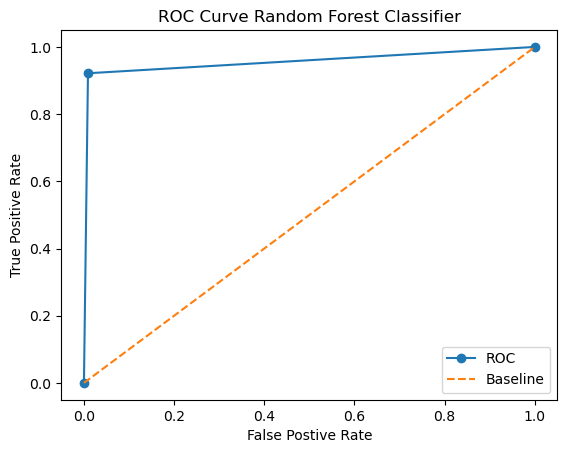

In [97]:
#Code to plot ROC Curve found on https://www.geeksforgeeks.org/auc-roc-curve/
plt.plot(fpr_randForest, tpr_randForest, '-o',label='ROC')
plt.plot([0,1],[0,1],'--',label='Baseline')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest Classifier')
plt.legend()
plt.show()

### 4.3 Gradient Boosted Classification

Training Gradient Bossting Classification Model as well as applying GridSearchCV in order to test different hyperparameters for penalty and perform 5-fold cross validation to provide a more generalizable model.

In [98]:
gradBoost = GradientBoostingClassifier()
params_gradBoost = {'n_estimators':[10,50,100,200], 'criterion':['friedman_mse', 'squared_error'],'max_depth':[10,50,100,200], 'learning_rate':[0.001,0.01,0.1,1,2],'loss':['log_loss','exponential']}
gradBoost_grided = GridSearchCV(estimator=gradBoost, param_grid=params_gradBoost, scoring='accuracy', cv=5)

In [99]:
start_gradBoost = time.time()
gradBoost_grided.fit(X_train, y_train)
end_gradBoost = time.time()
total_gradBoost = end_gradBoost - start_gradBoost

In [100]:
gradBoost_grided.best_estimator_.feature_names_in_

array(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'date_diff', 'creation_source_GUEST_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'], dtype=object)

In [101]:
gradBoost_grided.best_estimator_.feature_importances_

array([0.02069685, 0.0171869 , 0.90275064, 0.01807781, 0.01135708,
       0.01551537, 0.01441536])

In [102]:
gradBoost_grided.best_params_

{'criterion': 'squared_error',
 'learning_rate': 2,
 'loss': 'log_loss',
 'max_depth': 100,
 'n_estimators': 10}

In [103]:
print(f"Gradient Boosting Classification fit time: {total_gradBoost:.2f} seconds")

Gradient Boosting Classification fit time: 1263.55 seconds


In [104]:
predict_gradBoost = gradBoost_grided.predict(x_test)

In [105]:
gradBoost_grided.best_score_

0.975595238095238

In [106]:
print(confusion_matrix(predict_gradBoost, y_test))

[[2874   25]
 [  65  636]]


In [107]:
fpr_gradBoost, tpr_gradBoost, thresholds_gradBoost = roc_curve(predict_gradBoost, y_test)

In [108]:
gradBoost_roc = roc_auc_score(predict_gradBoost, y_test)
gradBoost_roc

0.9493258288189296

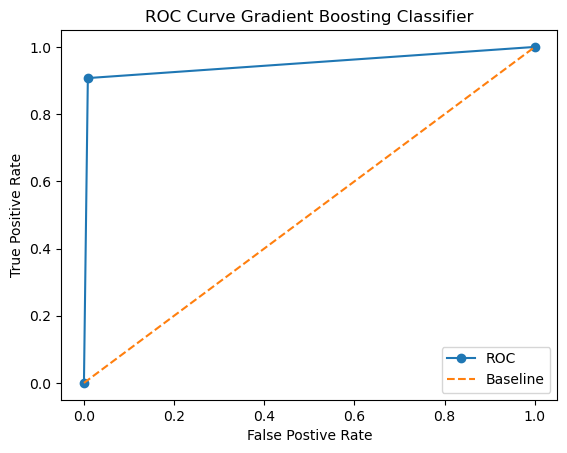

In [109]:
#Code to plot ROC Curve found on https://www.geeksforgeeks.org/auc-roc-curve/
plt.plot(fpr_gradBoost, tpr_gradBoost, '-o',label='ROC')
plt.plot([0,1],[0,1],'--',label='Baseline')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gradient Boosting Classifier')
plt.legend()
plt.show()

### 4.4 AdaBoost Classification (Random Forest Classification Base)

Training AdaBoost Classification Model applying the above best Random Forest Model to be improved as well as applying GridSearchCV in order to test different hyperparameters for penalty and perform 5-fold cross validation to provide a more generalizable model.

In [110]:
randForest_grided.best_params_

{'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 10}

In [111]:
adaBoost = AdaBoostClassifier(estimator = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 10))
params_adaBoost = {'n_estimators':[10,50,100,200], 'learning_rate':[0.001,0.01,0.1,1,2]}
adaBoost_grided = GridSearchCV(estimator=adaBoost, param_grid=params_adaBoost, scoring='accuracy', cv=5)

In [112]:
start_adaBoost = time.time()
adaBoost_grided.fit(X_train, y_train)
end_adaBoost = time.time()
total_adaBoost = end_gradBoost - start_gradBoost

In [113]:
adaBoost_grided.best_estimator_.feature_names_in_

array(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'date_diff', 'creation_source_GUEST_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'], dtype=object)

In [114]:
adaBoost_grided.best_estimator_.feature_importances_

array([0.00153923, 0.00137706, 0.98211741, 0.00183996, 0.00566597,
       0.00269107, 0.0047693 ])

In [115]:
print(f"AdaBoost Classification w/ Random Forest Classification fit time: {total_adaBoost:.2f} seconds")

AdaBoost Classification w/ Random Forest Classification fit time: 1263.55 seconds


In [116]:
adaBoost_grided.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [117]:
predict_adaBoost = adaBoost_grided.predict(x_test)

In [118]:
adaBoost_grided.best_score_

0.9757142857142856

In [119]:
print(confusion_matrix(predict_adaBoost, y_test))

[[2890   26]
 [  49  635]]


In [120]:
fpr_adaBoost, tpr_adaBoost, thresholds_adaBoost = roc_curve(predict_adaBoost, y_test)

In [121]:
adaBoost_roc = roc_auc_score(predict_adaBoost, y_test)
adaBoost_roc

0.9597231246841382

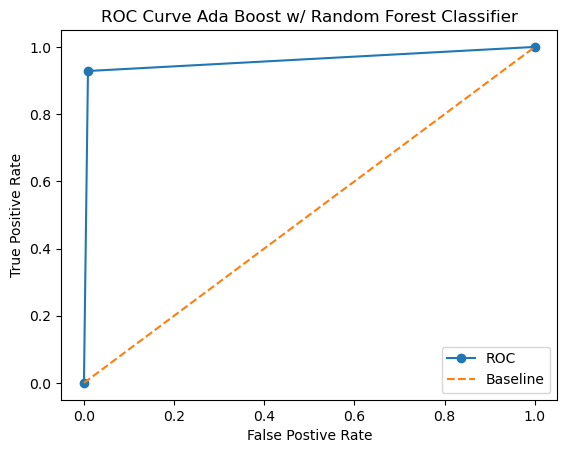

In [122]:
#Code to plot ROC Curve found on https://www.geeksforgeeks.org/auc-roc-curve/
plt.plot(fpr_adaBoost, tpr_adaBoost, '-o',label='ROC')
plt.plot([0,1],[0,1],'--',label='Baseline')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Ada Boost w/ Random Forest Classifier')
plt.legend()
plt.show()

### 4.5 AdaBoost Classification (Gradient Boosting Classification Base)

Training AdaBoost Classification Model applying the above best Gradient Boosting Classification Model to be improved as well as applying GridSearchCV in order to test different hyperparameters for penalty and perform 5-fold cross validation to provide a more generalizable model.

In [123]:
gradBoost_grided.best_params_

{'criterion': 'squared_error',
 'learning_rate': 2,
 'loss': 'log_loss',
 'max_depth': 100,
 'n_estimators': 10}

In [124]:
adaBoost_grad = AdaBoostClassifier(estimator = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.01, loss='log_loss', max_depth = 10, n_estimators = 50))
params_adaBoost_grad = {'n_estimators':[10,50,100,200], 'learning_rate':[0.001,0.01,0.1,1,2]}
adaBoost_grided_grad = GridSearchCV(estimator=adaBoost_grad, param_grid=params_adaBoost_grad, scoring='accuracy', cv=5)

In [125]:
start_adaBoost_grad = time.time()
adaBoost_grided_grad.fit(X_train, y_train)
end_adaBoost_grad = time.time()
total_adaBoost_grad = end_gradBoost - start_gradBoost

In [126]:
adaBoost_grided_grad.best_estimator_.feature_names_in_

array(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'date_diff', 'creation_source_GUEST_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'], dtype=object)

In [127]:
adaBoost_grided_grad.best_estimator_.feature_importances_

array([0.00562767, 0.0067658 , 0.96147021, 0.00641262, 0.00633509,
       0.00628264, 0.00710597])

In [128]:
print(f"AdaBoost Classification w/ Random Forest Classification fit time: {total_adaBoost_grad:.2f} seconds")

AdaBoost Classification w/ Random Forest Classification fit time: 1263.55 seconds


In [129]:
predict_adaBoost_grad = adaBoost_grided_grad.predict(x_test)

In [130]:
adaBoost_grided_grad.best_params_

{'learning_rate': 1, 'n_estimators': 10}

In [131]:
adaBoost_grided_grad.best_score_

0.9764285714285714

In [132]:
print(confusion_matrix(predict_adaBoost_grad, y_test))

[[2889   25]
 [  50  636]]


In [133]:
fpr_adaBoost_grad, tpr_adaBoost_grad, thresholds_adaBoost_grad = roc_curve(predict_adaBoost_grad, y_test)

In [134]:
adaBoost_grad_roc = roc_auc_score(predict_adaBoost_grad, y_test)
adaBoost_grad_roc

0.9592672150731065

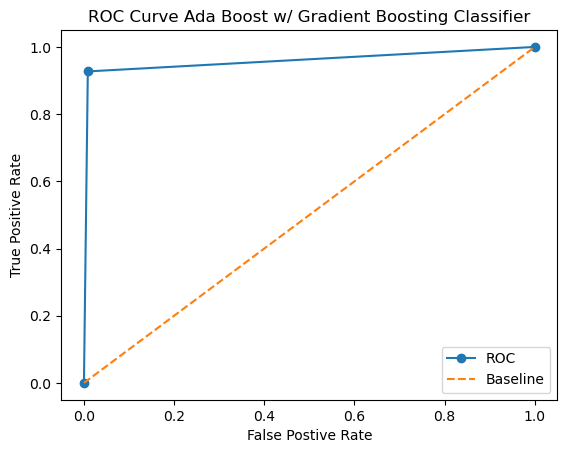

In [135]:
#Code to plot ROC Curve found on https://www.geeksforgeeks.org/auc-roc-curve/
plt.plot(fpr_adaBoost_grad, tpr_adaBoost_grad, '-o',label='ROC')
plt.plot([0,1],[0,1],'--',label='Baseline')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Ada Boost w/ Gradient Boosting Classifier')
plt.legend()
plt.show()

## 5. Conclusions/Further Study

### 5.1 Summary Table/Model Results

In [136]:
summary = {'Model_Name':['Random Forest Classifier', 'Gradient Boosted Classifier', 'AdaBoost w/ Random Forest', 'AdaBoost w/ Gradient Boosted'], 'Accuracy':[randForest_grided.best_score_, gradBoost_grided.best_score_,adaBoost_grided.best_score_,adaBoost_grided_grad.best_score_], 'ROC_AUC_Score':[randForest_roc, gradBoost_roc, adaBoost_roc, adaBoost_grad_roc], "Training Time (sec)":[total_randForest, total_gradBoost, total_adaBoost, total_adaBoost_grad]}

In [137]:
summary_df = pd.DataFrame(summary)
summary_df

,Model_Name,Accuracy,ROC_AUC_Score,Training Time (sec)
0,Random Forest Classifier,0.976071,0.956347,55.688117
1,Gradient Boosted Classifier,0.975595,0.949326,1263.554496
2,AdaBoost w/ Random Forest,0.975714,0.959723,1263.554496
3,AdaBoost w/ Gradient Boosted,0.976429,0.959267,1263.554496


In [138]:
randForest_grided.best_estimator_.feature_importances_

array([0.00243869, 0.00201278, 0.98257617, 0.00134578, 0.00519405,
       0.00225187, 0.00418066])

In [139]:
feature_dict = {}
for i in range(len(randForest_grided.best_estimator_.feature_importances_)):
    feature_dict[randForest_grided.best_estimator_.feature_names_in_[i]] = randForest_grided.best_estimator_.feature_importances_[i]

In [140]:
feature_df = pd.DataFrame([feature_dict])
feature_df

,opted_in_to_mailing_list,enabled_for_marketing_drip,date_diff,creation_source_GUEST_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,0.002439,0.002013,0.982576,0.001346,0.005194,0.002252,0.004181


### 5.2 Discussion/Further Study

After an EDA of the merged datasets, it seems there are a few factors that have correlations with the target variable of whether or not a user will be an adopted user. Repeating the above findings: The highest correlation was not only is when the user signed up for the product and their last login dater, but it seems also that if the user was invited as a guest within the system, they seemed to be more likely to be an adopted user down the line. However, if the user was invited or within the system because of personal projects, they seemed less likely to or less correlated to become an adopted user for the product. Also, it seems that the more overrepresented group of ORG_INVITE or if a user was invited by the organization they were actually not as likely to become an adopted user. 

After constructing and assessing several predictive models to determine feature_importances, it appears the model of choice as per accuracy, ROC AUC values, and Training Time would be the Random Forest Classifier. Then assessing the model's feature importances, few factors seemed to affect the predictability of the model namely the engineered feature 'date_diff', 'creation_soruce_PERSONAL_PROJECTS' and 'creation_source_SIGNUP_GOOGLE_AUTH.' Therefore not only is when the user signed up and their last login time an important feature affect whether or not the user will be an adopted user, but it seemed from feature_importances that if a user was invited to create a login account through working with another user's personal project or if the user signed up for the product via a Google account they were likely to become longer termed members or adopted users. Therefore, incentivizing the current user base to have more outside collaboration on projects (such as discounts for partner projects) as well as streamlining product sign ups (maybe on main company website) to be more via Google authentication instead of for example within the website itself, should potentially lead to more adopted users for the product. However, as mentioned further study will need to undertaken in order to garner a more accurate understanding of the data behavior especially as per null values within the 'last_session_creation_time' field. Also, more hyperparameters could be tested for the different models in order to achieve a better performance such as learning_rate.  

This concludes the above study.